# Description:
Plot data and derived quantities from the daily number of new COVID-19 infections in Saarland, Germany.

The data can be found here:
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Fallzahlen_Kum_Tab.html

In [1]:
# Library Imports
# ---------------------------------------------------------------------------
import csv
import math
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
%matplotlib inline
#notebook, tk, qt, ...
print('Done.')

Done.


## Reading .csv file

In [2]:
# Define data file name
data_file_name = 'Fallzahlen_Kum_Tab_20210516.csv'

# Load the data file
df = pd.read_csv(data_file_name)

# Select rows by indices (dumb way to select data rows...)
lk_indices = [351,324,230,367, 366]

# Population total (dumb way of defining it, but the data is not in the .xlsx file provided by Dr. Kocher)
population_numbers = [328714, 194319, 103243, 149398, 111528]

# Create lists with data
header     = []
dates      = []
lk_names   = []
n_cases    = []
incidences = []

# Obtain dates
header = df.head() # This is the header (zeroth row)
for date_index, date in enumerate(header):
    if date_index > 1:
        dates.append(date)
#print(' dates: ', dates)

dates_formatted = [dt.datetime.strptime(d,'%d.%m.%Y').date() for d in dates]
#print(' dates_formatted: ')
#print(dates_formatted)

#n_cases = df.iloc[2][2:-1]

# Obtain lk_names and n_cases
for lk_index, lk in enumerate(lk_indices):
    lk_names.append(df.iloc[lk][0])
    n_cases.append(df.iloc[lk][2:])
    incidences.append(df.iloc[lk][2:]/population_numbers[lk_index]*100000)
#print(' lk_names: ', lk_names)
#print(' n_cases:  ', n_cases)

print('Done.')

Done.


# Plots

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


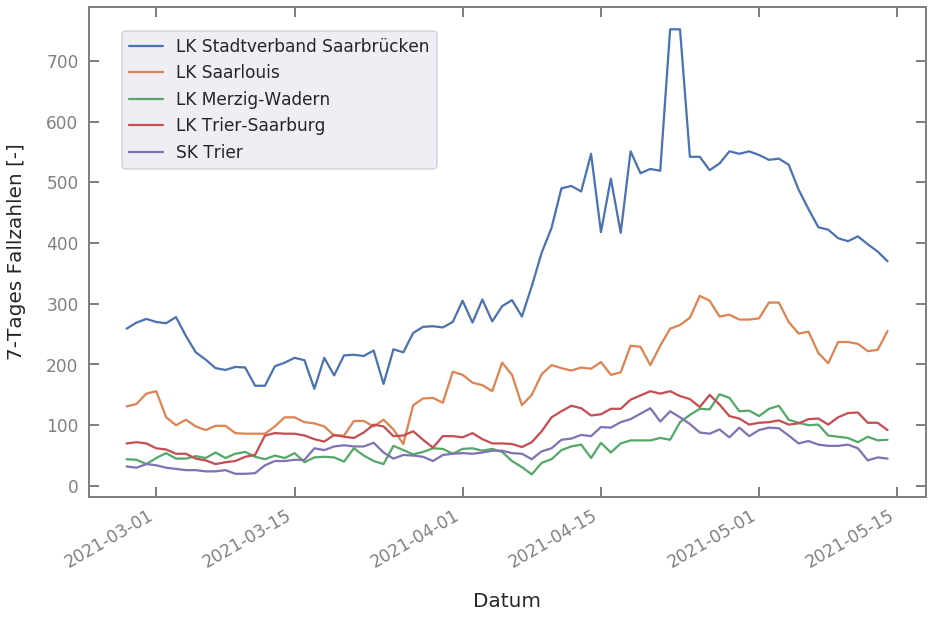

In [3]:
seaborn.set(rc={'figure.figsize':(15, 10),})
seaborn.set_context('talk') # or paper

# Define parameters of the frame
fig = plt.figure() # plt.figure(figsize=(width,height))
#fig.patch.set_facecolor('white')
#fig.patch.set_alpha(0.0)
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('#ababab') # #ababab
ax.patch.set_alpha(0.0)
ax.spines['bottom'].set_color('0.5') #'black', ...
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('0.5')
ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_color('0.5')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('0.5')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_visible(True)

# Ticks, grid and ticks labels
ax.tick_params(direction='in', length=10, width=2,                  # direction, length and width of the ticks (in, out, inout)
                colors='0.5',                                       # color of the ticks ('black', '0.5')
                bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
                zorder = 10.,                                       # tick and label zorder
                pad = 10.,                                          # distance between ticks and tick labels
                labelsize = 17,                                     # size of the tick labels
                labelright=False, labeltop=False)                   # wether to draw the tick labels on axes
                #labelrotation=45.                                  # rotation of the labels
                #grid_color='black',                                # grid
                #grid_alpha=0.0,
                #grid_linewidth=1.0,
# colors='black','0.5'

# Define start index of data to be plotted
start_index = 100 #150

for series_index, series in enumerate(n_cases):
    plt.plot(dates_formatted[start_index:-1],n_cases[series_index][start_index:-1],label=lk_names[series_index])
#plt.hist(data_series, label=label_series, bins=x_bins , histtype=histtype, stacked=stacked, linewidth=3, alpha=0.8)
#plt.axhline(y=100, color='r', linestyle=':')
plt.gcf().autofmt_xdate()

# Axis labels
plt.xlabel('Datum', fontsize=20, labelpad=20)
plt.ylabel('7-Tages Fallzahlen [-]', fontsize=20, labelpad=20)

# Rotate x axis labels
#plt.setp(ax.get_xticklabels(), rotation=65)

# Format x axis labels
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())

#plt.yscale('log') # linear, log
#plt.yscale('symlog', linthreshy=1)

# Legend
plt.legend(loc=[0.04,0.67], prop={'size': 17}) # loc='upper right', [0.65, 0.05]

# Save figure
save_name = '7-tages-fallzahlen_vs_datum.png'
plt.savefig('plots/' + save_name, dpi=400) # bbox_inches='tight'

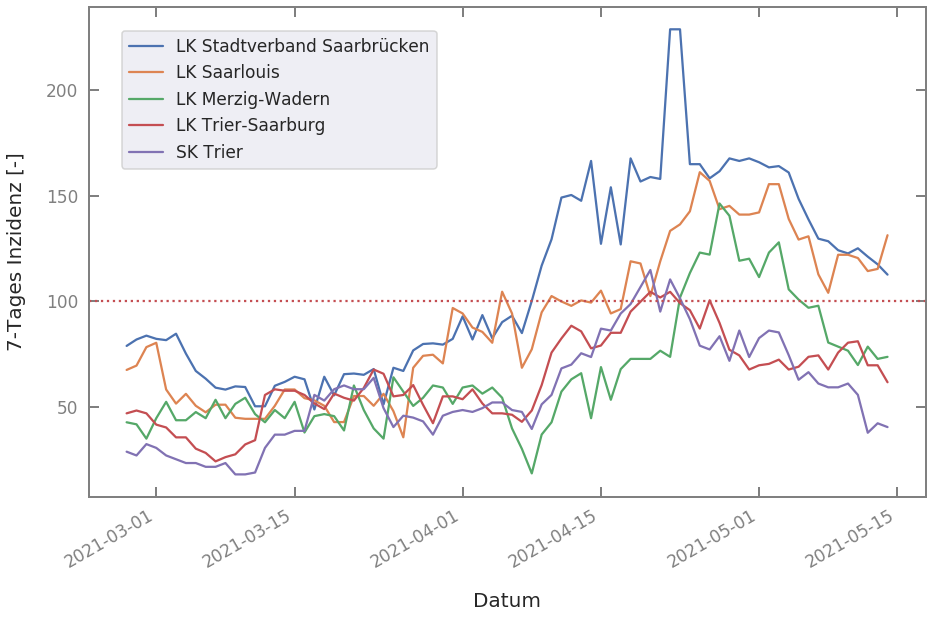

In [4]:
seaborn.set(rc={'figure.figsize':(15, 10),})
seaborn.set_context('talk') # or paper

# Define parameters of the frame
fig = plt.figure() # plt.figure(figsize=(width,height))
#fig.patch.set_facecolor('white')
#fig.patch.set_alpha(0.0)
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('#ababab') # #ababab
ax.patch.set_alpha(0.0)
ax.spines['bottom'].set_color('0.5') #'black', ...
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('0.5')
ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_color('0.5')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('0.5')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_visible(True)

# Ticks, grid and ticks labels
ax.tick_params(direction='in', length=10, width=2,                  # direction, length and width of the ticks (in, out, inout)
                colors='0.5',                                       # color of the ticks ('black', '0.5')
                bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
                zorder = 10.,                                       # tick and label zorder
                pad = 10.,                                          # distance between ticks and tick labels
                labelsize = 17,                                     # size of the tick labels
                labelright=False, labeltop=False)                   # wether to draw the tick labels on axes
                #labelrotation=45.                                  # rotation of the labels
                #grid_color='black',                                # grid
                #grid_alpha=0.0,
                #grid_linewidth=1.0,
# colors='black','0.5'

# Define start index of data to be plotted
start_index = 100 #150


for series_index, series in enumerate(incidences):
    plt.plot(dates_formatted[start_index:-1],incidences[series_index][start_index:-1],label=lk_names[series_index])
#plt.hist(data_series, label=label_series, bins=x_bins , histtype=histtype, stacked=stacked, linewidth=3, alpha=0.8)
plt.axhline(y=100, color='r', linestyle=':')
plt.gcf().autofmt_xdate()

# Axis labels
plt.xlabel('Datum', fontsize=20, labelpad=20)
plt.ylabel('7-Tages Inzidenz [-]', fontsize=20, labelpad=20)

# Rotate x axis labels
#plt.setp(ax.get_xticklabels(), rotation=65)

# Format x axis labels
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())

#plt.yscale('log') # linear, log
#plt.yscale('symlog', linthreshy=1)

# Legend
plt.legend(loc=[0.04,0.67], prop={'size': 17}) # loc='upper right', [0.65, 0.05]

# Save figure
save_name = '7-tages-inzidenz_vs_datum.png'
plt.savefig('plots/' + save_name, dpi=400) # bbox_inches='tight'